In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from pycaret.classification import *
import mlflow

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pycaret.utils import version
version()

'3.0.0.rc4'

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df['Medaled'] = df['Medal'].apply(lambda x: 0 if (x is np.nan) else 1)

In [ ]:
df['Medal'] = df['Medal'].apply(lambda x: 'No Medal' if (x is np.nan) else x)

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medaled
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,0


In [ ]:
df_no_nan = df.dropna()

In [ ]:
df.shape, df_no_nan.shape

((271116, 16), (206165, 16))

In [ ]:
df_no_nan.drop(['Name', 'Games', 'ID', 'Team'], axis=1, inplace= True)

In [ ]:
#df_no_nan.drop(['Event'], axis=1, inplace= True)

KeyError: ignored

In [ ]:
df_no_nan

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Medaled
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
5,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,0
6,F,25.0,185.0,82.0,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal,0
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal,0
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal,0
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal,0


In [ ]:
df_no_nan.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

Sex         2
NOC       226
Season      2
City       42
Sport      56
Event     590
Medal       4
dtype: int64

In [ ]:
X = df_no_nan.drop(columns=['Medal', 'Medaled'])
y = df_no_nan['Medaled']

In [ ]:
X

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event
0,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
5,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres"
6,F,25.0,185.0,82.0,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four


In [ ]:
y.value_counts()

0    175984
1     30181
Name: Medaled, dtype: int64

In [ ]:
df['City'].value_counts()

London                    22426
Athina                    15556
Sydney                    13821
Atlanta                   13780
Rio de Janeiro            13688
Beijing                   13602
Barcelona                 12977
Los Angeles               12423
Seoul                     12037
Munich                    10304
Montreal                   8641
Mexico City                8588
Helsinki                   8270
Roma                       8119
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4829
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sarajevo

In [ ]:
df_no_nan_w = df_no_nan[df_no_nan['Season'] == 'Winter']


In [ ]:
df_no_nan_w_re = df_no_nan[(df_no_nan['Season'] == 'Winter') & (df_no_nan['Year'] > 1960)]

In [ ]:
Xwr = df_no_nan_w_re.drop(columns=['Medal', 'Medaled'])
ywr = df_no_nan_w_re['Medaled']

In [ ]:
Xwr

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event
4,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
5,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres"
6,F,25.0,185.0,82.0,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres
7,F,25.0,185.0,82.0,NED,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres"
8,F,27.0,185.0,82.0,NED,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles
271112,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four


In [ ]:
clf = setup(data=pd.concat([Xwr, ywr], axis=1),
            target = 'Medaled',
            session_id = 42,
            train_size = 0.7,

            experiment_name = 'j1',
            preprocess = True,
            #high_cardinality_features = ['NOC', 'Event', 'Sport', 'City'],
            #high_cardinality_method = 'frequency',
            #handle_unknown_categorical = False,
            pca = False,
            #pca_method = ‘incremental’,
            #combine_rare_levels = True,
            #rare_level_threshold = 0.02,
            remove_outliers= True,
            outliers_threshold= 0.02,
            #create_clusters = False,
            #cluster_iter = 20,

            fix_imbalance = True, #uses SMOTE,
            #fix_imbalance_method = 'SMOTE',


            
            normalize = True,
            normalize_method = 'zscore',
            log_experiment=True,
            #remove_multicollinearity= True, 
            #multicollinearity_threshold = 0.85,
            #feature_selection= True,
            #n_features_to_select = 6,
            #feature_selection_threshold= 0.8,
            #use_gpu	= True,
            )

,Description,Value
0,Session id,42
1,Target,Medaled
2,Target type,Binary
3,Original data shape,"(38172, 11)"
4,Transformed data shape,"(57992, 10)"
5,Transformed train set shape,"(46573, 10)"
6,Transformed test set shape,"(11452, 10)"
7,Ordinal features,1
8,Numeric features,4
9,Categorical features,6


In [ ]:
    '''data: DATAFRAME_LIKE,
    index: Union[bool, int, str, SEQUENCE_LIKE] = False,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    preprocess: bool = True,
    create_date_columns: List[str] = ["day", "month", "year"],
    imputation_type: Optional[str] = "simple",
    numeric_imputation: str = "mean",
    categorical_imputation: str = "constant",
    text_features_method: str = "tf-idf",
    max_encoding_ohe: int = -1,
    encoding_method: Optional[Any] = None,
    rare_to_value: Optional[float] = None,
    rare_value: str = "rare",
    polynomial_features: bool = False,
    polynomial_degree: int = 2,
    low_variance_threshold: Optional[float] = 0,
    remove_multicollinearity: bool = False,
    multicollinearity_threshold: float = 0.9,
    bin_numeric_features: Optional[List[str]] = None,
    remove_outliers: bool = False,
    outliers_method: str = "iforest",
    outliers_threshold: float = 0.05,
    transformation: bool = False,
    transformation_method: str = "yeo-johnson",
    normalize: bool = False,
    normalize_method: str = "zscore",
    pca: bool = False,
    pca_method: str = "linear",
    pca_components: Optional[Union[int, float, str]] = None,
    custom_pipeline: Optional[Any] = None,
    custom_pipeline_position: int = -1,
    n_jobs: Optional[int] = -1,
    use_gpu: bool = False,
    html: bool = True,
    session_id: Optional[int] = None,
    system_log: Union[bool, str, logging.Logger] = True,
    log_experiment: Union[bool, str, BaseLogger, List[Union[str, BaseLogger]]] = False,
    experiment_name: Optional[str] = None,
    experiment_custom_tags: Optional[Dict[str, Any]] = None,
    log_plots: Union[bool, list] = False,
    log_profile: bool = False,
    log_data: bool = False,
    verbose: bool = True,
    memory: Union[bool, str, Memory] = True,
    profile: bool = False,
    profile_kwargs: Optional[Dict[str, Any]] = None,

In [ ]:
best_model = compare_models(fold=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7665,0.7494,0.5945,0.2780,0.3789,0.2577,0.2859,3.6733
nb,Naive Bayes,0.7485,0.7649,0.6229,0.2656,0.3723,0.2456,0.2807,1.8700
qda,Quadratic Discriminant Analysis,0.7390,0.7690,0.6367,0.2595,0.3687,0.2393,0.2777,1.9467
ridge,Ridge Classifier,0.7076,0.0000,0.6985,0.2461,0.3639,0.2270,0.2792,1.4233
lda,Linear Discriminant Analysis,0.7076,0.7826,0.6985,0.2461,0.3639,0.2270,0.2792,1.9300
lr,Logistic Regression,0.7055,0.7828,0.6992,0.2447,0.3625,0.2250,0.2775,9.4933
svm,SVM - Linear Kernel,0.6826,0.0000,0.7279,0.2344,0.3546,0.2118,0.2717,1.5667
et,Extra Trees Classifier,0.8927,0.8202,0.1721,0.7194,0.2768,0.2419,0.3163,4.6433
rf,Random Forest Classifier,0.7677,0.6426,0.3730,0.2216,0.2712,0.1462,0.1568,6.2033
dt,Decision Tree Classifier,0.4851,0.5460,0.6261,0.1374,0.2233,0.0356,0.0619,2.0600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
knn = create_model('knn', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7585,0.7371,0.5390,0.3120,0.3952,0.2575,0.2725
1,0.7651,0.7618,0.5939,0.3314,0.4254,0.2924,0.3121
2,0.7647,0.7436,0.5499,0.3222,0.4063,0.2718,0.2870
3,0.7733,0.7653,0.5897,0.3413,0.4323,0.3031,0.3208
4,0.7678,0.7494,0.5745,0.3312,0.4201,0.2879,0.3049
5,0.7688,0.7447,0.5611,0.3297,0.4154,0.2832,0.2988
6,0.7669,0.7541,0.5814,0.3312,0.4220,0.2895,0.3075
7,0.7730,0.7593,0.5791,0.3388,0.4275,0.2978,0.3145
8,0.7707,0.7524,0.5745,0.3350,0.4232,0.2923,0.3089


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8947,0.7788,0.2271,0.7264,0.3461,0.3055,0.3675
1,0.8939,0.8074,0.2625,0.6742,0.3779,0.3320,0.3765
2,0.8896,0.8066,0.1917,0.6771,0.2989,0.2587,0.3206
3,0.8791,0.7767,0.1858,0.5207,0.2739,0.2238,0.2596
4,0.8834,0.7773,0.2065,0.5691,0.3030,0.2543,0.2937
5,0.8939,0.7968,0.2596,0.6769,0.3753,0.3297,0.3753
6,0.8849,0.7605,0.1711,0.6105,0.2673,0.2257,0.2806
7,0.8921,0.7850,0.2271,0.6814,0.3407,0.2976,0.3516
8,0.8936,0.7953,0.2278,0.7000,0.3438,0.3018,0.3590


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#tuned_lgbm = tune_model(lgbm, 
#                        n_iter = 50,
#                        search_library='scikit-optimize',
#                        search_algorithm= 'bayesian',
#                        optimize='f1',
#                        fold=15
#                        )

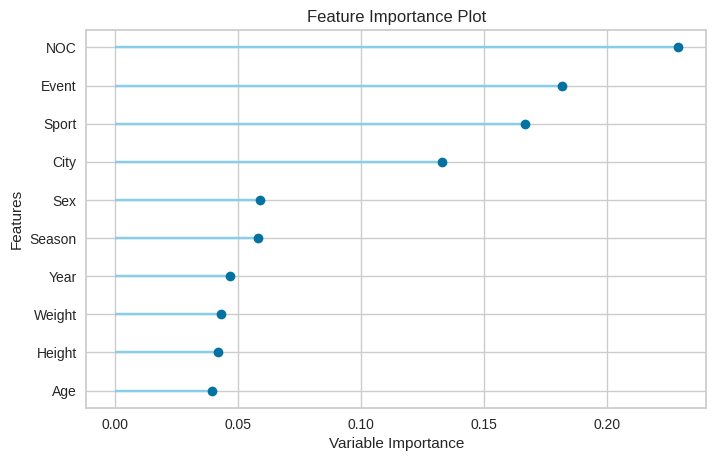

In [ ]:
plot_model(et, plot='feature_all')


In [ ]:
knn.feature_importances_

AttributeError: ignored

In [ ]:
#best_features = pd.DataFrame(lgbm.feature_importances_).sort_values(0, ascending=False)
best_features

In [ ]:
#final_lgbm = finalize_model(tuned_lgbm)

In [ ]:
#prediction_df = predict_model(final_lgbm, data=df_features_test.drop('Id', axis=1))
#prediction_df

In [ ]:
#predictions = prediction_df['prediction_label'].reset_index()
#predictions = predictions.rename(columns={'index': 'Id', 'prediction_label': 'Predicted'})

In [ ]:
#predictions.to_csv('predictions_jp.csv')